        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


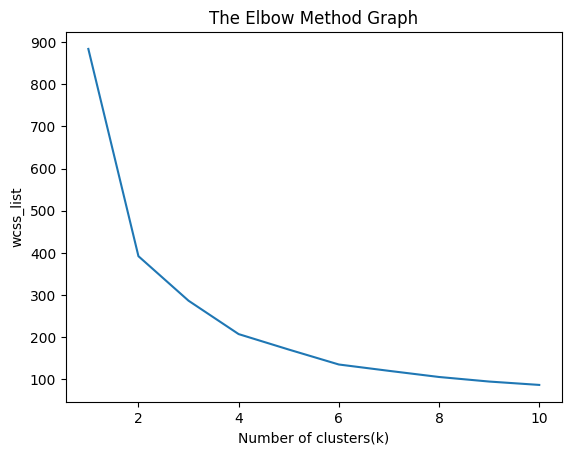

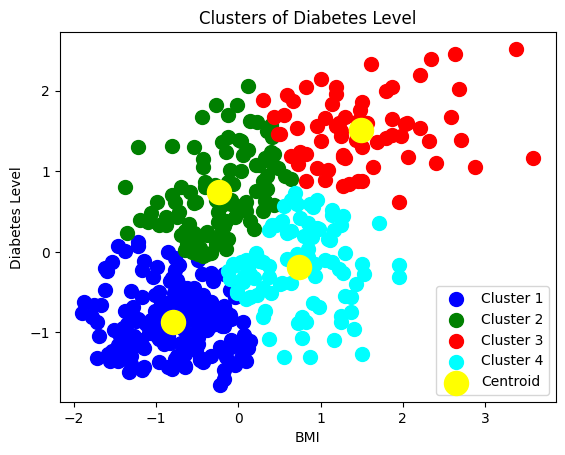

In [2]:
# From https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

diabetes_ds = datasets.load_diabetes()

# Load the diabetes dataset
df_X = pd.DataFrame(data=diabetes_ds.data, columns=diabetes_ds.feature_names)
df_y = pd.DataFrame(data=diabetes_ds.target, columns=['Target'])
df_X.insert(len(df_X.columns),'Target',df_y.values)
print(df_X.head())
# print(df_X.head())

# we are extracting the BMI feature compared to the Diabetes Level
x = df_X.iloc[:, [2,10]].values 

#changed the feature selection.

# Answer: I have chosen BMI and target as the features for clustering. Initially, I tried using features 1 and 10, and the 
#resulting clusters were arranged vertically. However, when I switched to using BMI and target, the clusters formed horizontally.
#Each centroid is associated with a different cluster, giving out meaningful patterns in the data. Here BMI relates to the diabetic level. 

# Scale the data using StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
#print(x)


wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  #changed from 1 to 20 to 1 to 11
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
    
plt.plot(range(1, 11), wcss_list)  #changed from 1 to 20 to 1 to 11
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  #gave number 4
y_predict= kmeans.fit_predict(x) 

#visulaizing the clusters  (given only 1 cluster, I gave 3 more clusters)
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster 
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  #for second cluster 
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  #for third cluster 
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  #for fourth cluster 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')

plt.title('Clusters of Diabetes Level')  
plt.xlabel('BMI')  
plt.ylabel('Diabetes Level')  
plt.legend()  
plt.show()

#The main difference is that K-Means is an unsupervised learning algorithm that groups data into clusters without using a target label,
#while Linear Regression is a supervised learning algorithm that predicts the target variable based on selected features. 
#In K-Means, both BMI and target are treated as features, allowing the algorithm to find natural groupings within the data. 
#K-Means does not predict values but instead identifies patterns by clustering similar data points. 
#In contrast, Linear Regression models a linear relationship between the features and the target (dependent variable) to make 
#continuous predictions. It finds a formula that predicts the target variable upon input features, rather than grouping data into clusters.